# Importing relevant geospatial/python library packages

In [22]:
import geopandas as gdp
import pandas as pd
import numpy as np
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import os
from glob import glob


In [26]:
# paths    
    
landsat_path = glob("Landsat_files/LC08_L1TP_091086_20191222_20200110_01_T1_sr_band*.tif")
landsat_path.sort()
array_stack, meta_data = es.stack(landsat_path, nodata=-9999)

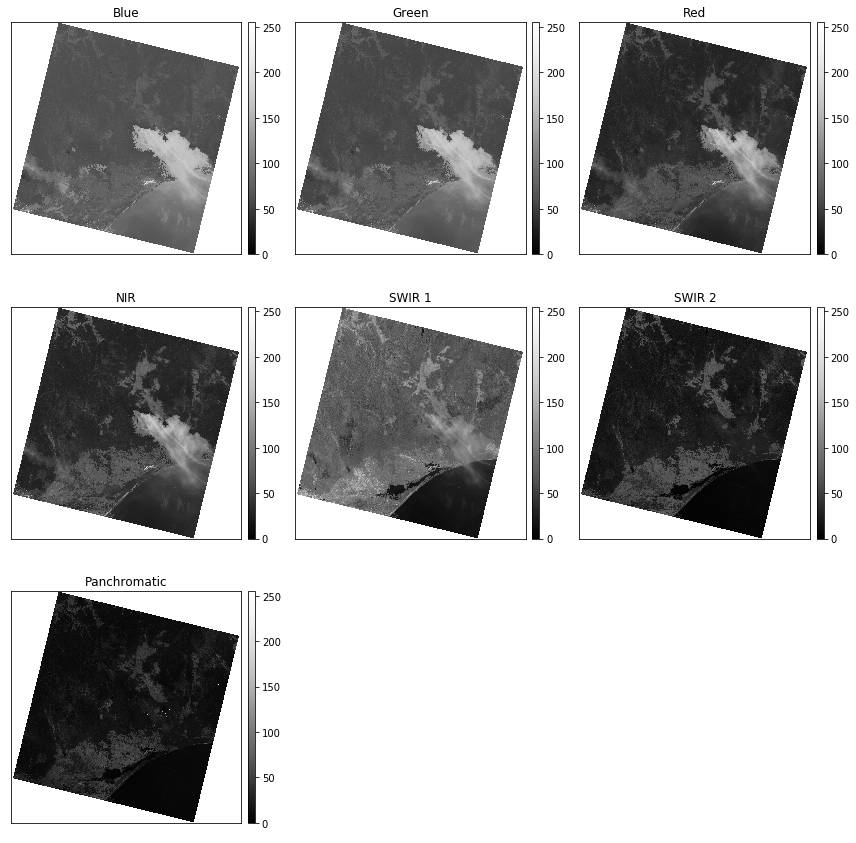

NameError: name 'plt' is not defined

In [27]:
# mapping individual bands

titles = ["Blue", "Green", "Red", "NIR", "SWIR 1", "SWIR 2", "Panchromatic"]
# sphinx_gallery_thumbnail_number = 1
ep.plot_bands(array_stack, title=titles)
plt.show()

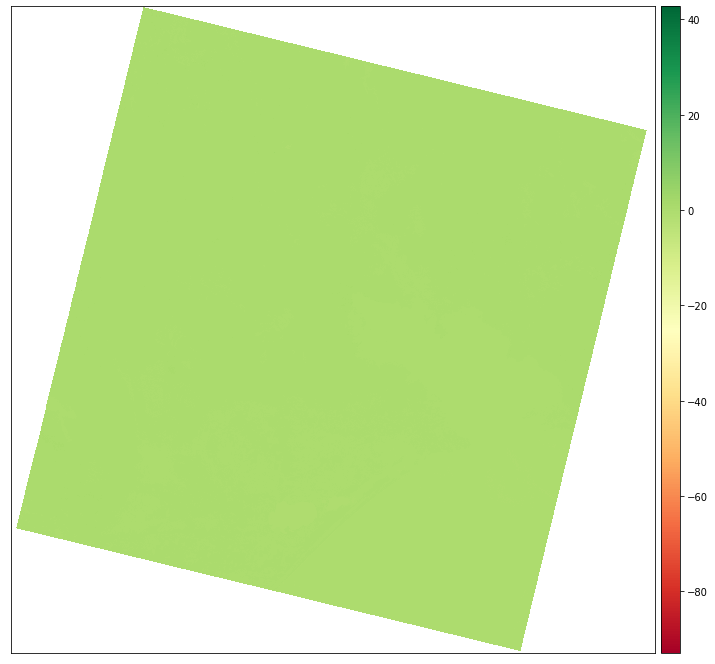